#### Importing lib to get data in required format

In [15]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

!pip install geocoder
import geocoder

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium
import folium # plotting library

!pip install bs4 # beautifulsoup

print('Folium installed')
print('beautifulsoup installed')
print('Libraries imported.')

Folium installed
beautifulsoup installed
Libraries imported.


ERROR: Invalid requirement: '#'


In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import pandas as pd
import requests
from bs4 import BeautifulSoup

### Downloading the Dataset

In [2]:
url = "https://www.centenarybank.co.ug/index.php/branches/index"

In [3]:
html_data  = requests.get(url).text

#### Extracting ATM dataset

In [4]:
soup = BeautifulSoup(html_data,"html5lib")
tables1 = soup.find_all('table')

In [5]:
for index,table in enumerate(tables1):
    if ("Boxing Supermarket Kamwokya Market" in str(table)):
        table_index1 = index
print(table_index1)

0


In [6]:
atm_data = pd.DataFrame(columns=["Location", "Neighborhood"])

for row in tables1[table_index1].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        location = col[0].text.strip("\n")
        address = col[1].text.strip("\n")
        atm_data = atm_data.append({"Location":location, "Neighborhood":address}, ignore_index=True)
    
atm_data.head()

,Location,Neighborhood
0,Arua,"Catholic Center Building, Near Christ the King..."
1,Bugolobi,"Spring Road, Middle East Hospital & shopping c..."
2,Bugembe,"Bugembe Town Council, Jinja-Iganga highway."
3,Busia,"Busia Customs Road, Busia town"
4,Iganga,"Main Street, Iganga town"


#### Extracting Branch dataset

In [7]:
soup = BeautifulSoup(html_data,"html5lib")
tables = soup.find_all('table')

In [8]:
for index,table in enumerate(tables):
    if ("Adjumani" in str(table)):
        table_index = index
print(table_index)

1


In [9]:
branch_data = pd.DataFrame(columns=["Location", "Neighborhood"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        location = col[0].text.strip("\n")
        address = col[1].text.strip("\n")
        branch_data = branch_data.append({"Location":location, "Neighborhood":address}, ignore_index=True)
    
branch_data.head()

,Location,Neighborhood
0,Branch,Location & Contact
1,Adjumani,"LVR 3176 Folio 18\nPlot 20, Manyi Road\nTel: +..."
2,Apac,"Plot 22, Akokoro Road\nApac Town\nTel: +256 41..."
3,Arua,"Plot 3, Avenue Road\nP.O Box 246 Arua\nTel: +2..."
4,Bugiri,"Plot 117, Grant street\nIganga - Tororo Highwa..."


#### Merging the ATM and Branch Data set since every branch has an ATM

In [10]:
df = pd.concat([atm_data,branch_data])

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df.head()

,Location,Neighborhood
0,Arua,"Catholic Center Building, Near Christ the King..."
1,Bugolobi,"Spring Road, Middle East Hospital & shopping c..."
2,Bugembe,"Bugembe Town Council, Jinja-Iganga highway."
3,Busia,"Busia Customs Road, Busia town"
4,Iganga,"Main Street, Iganga town"


#### Using geopy library to get the latitude and longitude values.

In [16]:
def get_latilong(codinates):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Kampala'.format(codinates))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('Kampala')

[0.31582000000003063, 32.57503000000003]

In [17]:
# Retrieving Co-ordinates for all Locations
codes = df['Neighborhood']    
coords = [ get_latilong(codinates) for codinates in codes.tolist() ]

In [18]:
# Adding Columns Latitude & Longitude to the dataset
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']

In [92]:
df.head()

,Location,Neighborhood,Latitude,Longitude
0,Arua,"Catholic Center Building, Near Christ the King...",0.315820,32.575030
1,Bugolobi,"Spring Road, Middle East Hospital & shopping c...",0.319457,32.620888
2,Bugembe,"Bugembe Town Council, Jinja-Iganga highway.",0.470120,33.248820
3,Busia,"Busia Customs Road, Busia town",0.463070,34.105660
4,Iganga,"Main Street, Iganga town",0.315820,32.575030
5,Kasubi,Petrol City Fuelling Station Kasubi town,0.332000,32.552340
6,Matuga,St. Francis of Assis Catholic Parish,44.304150,-79.550480
7,Gulu,"Lacor Hospital, Juba Road",0.315820,32.575030
8,Gulu,Gulu University,0.332086,32.569319
9,Gulu,Andrea Olal Road Opposite Shell petrol Station,0.315820,32.575030


In [20]:
address = 'Kampala ,UG'

geolocator = Nominatim(user_agent="kla_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kampala are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Kampala are 0.3177137, 32.5813539.


In [ ]:
from ipyleaflet import (Map,DrawControl) 
myMap=Map(center=[0.3177137, 32.5813539],zoam=5) 
dc=DrawControl(circle={'shapeOptions':{'color':'#0000FF'}}) 
myMap.add_control(dc) 
myMap 

In [82]:
from folium.plugins import Draw


# create map of Kampala  using latitude and longitude values
map_kampala = folium.Map(location=[latitude, longitude], zoom_start=12)

#map_kampala.save(map_kampala)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_kampala)  
    
map_kampala

#### Foursquare Credentials and Version

In [22]:
CLIENT_ID = 'RA54VBSMVPRL01AI4SWRFRSIPLHL1MXC14UMUSWHYB200RYQ' # your Foursquare ID
CLIENT_SECRET = 'OYKKWPP03IWNZ41FPD1UE0C2FAJ1H2WLLKRIZPXNHCPZWH0T' # your Foursquare Secret
ACCESS_TOKEN = 'BUGOIND21BRHDOX0BPO4VKRLPOMDBFH0NEE5XYKDYI3XZESA' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RA54VBSMVPRL01AI4SWRFRSIPLHL1MXC14UMUSWHYB200RYQ
CLIENT_SECRET:OYKKWPP03IWNZ41FPD1UE0C2FAJ1H2WLLKRIZPXNHCPZWH0T


In [23]:
df.loc[98, 'Neighborhood']

'Mapeera House Branch\nPlot 44/46, Kampala Road\nPlot 2, Burton Street\nP.O Box 1892, Kampala\nTel: +256 317 202 287'

#### Get the neighborhood's latitude and longitude values.

In [24]:
neighborhood_latitude = df.loc[98, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[98, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[98, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Mapeera House Branch
Plot 44/46, Kampala Road
Plot 2, Burton Street
P.O Box 1892, Kampala
Tel: +256 317 202 287 are 0.31582000000003063, 32.57503000000003.


#### Now, let's get the top 100 venues that are in Kampala within a radius of 500 meters.

In [25]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=RA54VBSMVPRL01AI4SWRFRSIPLHL1MXC14UMUSWHYB200RYQ&client_secret=OYKKWPP03IWNZ41FPD1UE0C2FAJ1H2WLLKRIZPXNHCPZWH0T&v=20180604&ll=0.31582000000003063,32.57503000000003&radius=500&limit=100'

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60463f311c678b21fb996799'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Kampala',
  'headerFullLocation': 'Kampala',
  'headerLocationGranularity': 'city',
  'totalResults': 11,
  'suggestedBounds': {'ne': {'lat': 0.3203200045000351,
    'lng': 32.57952167071228},
   'sw': {'lat': 0.31131999550002615, 'lng': 32.57053832928777}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '58e3c3080e0a1e1b3c4c1611',
       'name': 'Karveli Bakery And More',
       'location': {'address': 'Lumumba Avenue',
        'crossStreet': 'Lumumba Avenue',
        'lat': 0.31737042145166816,
        'lng': 32.578702010392966,
        'labeledLatLngs': [{'label': 'di

In [27]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-28-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Karveli Bakery And More,Coffee Shop,0.317370,32.578702
1,1000 Cups Coffee House,Coffee Shop,0.317532,32.576378
2,East African Craft Village!,Art Gallery,0.318095,32.576365
3,The Menu 24 cafe,Café,0.318371,32.575256
4,Bon Apetit,Fast Food Restaurant,0.317844,32.575095


In [29]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

11 venues were returned by Foursquare.


#### Let's create a function to repeat the same process to all the neighborhoods

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
uganda_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Catholic Center Building, Near Christ the King Church, Avenue Road
Spring Road, Middle East Hospital & shopping complex building Bugolobi
Bugembe Town Council, Jinja-Iganga highway.
Busia Customs Road, Busia town
Main Street, Iganga town
Petrol City Fuelling Station Kasubi town
St. Francis of Assis Catholic Parish
Lacor Hospital, Juba Road
Gulu University
Andrea Olal Road Opposite Shell petrol Station
Kyabakuza Trading Centre
Devine Mercy Arcade, Masaka Road
Jinja Road, Lugazi Town
Ham Towers, Tuskys Shopping Mall
Mengo Masengere, Kampala
Mpigi Town Council, Butabala Road, Park village
Assessment Centre, Mulago Hospital
Mukwano Shopping Mall Mukwano Arcade Buiding
Ziladamu building, New Masaka Road
Gapco Petrol station, Olwol Roads
Plot 18 Rushere, Kiruhura 
Canos Guest House, Naboa Road
Sheema Kabwohe, Bushenyi district
Kakiri Town 
Gulu highway next to Diocesan Cathedral
Near Mirembe Supermarket, Gayaza Road
Nsike at Christine Motel
Bweyogerere, UPET Petrol station Bweyogerere town, 

#### Let's check the size of the resulting dataframe

In [32]:
print(uganda_venues.shape)
uganda_venues.head()

(800, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Catholic Center Building, Near Christ the King...",0.31582,32.57503,Karveli Bakery And More,0.317370,32.578702,Coffee Shop
1,"Catholic Center Building, Near Christ the King...",0.31582,32.57503,1000 Cups Coffee House,0.317532,32.576378,Coffee Shop
2,"Catholic Center Building, Near Christ the King...",0.31582,32.57503,East African Craft Village!,0.318095,32.576365,Art Gallery
3,"Catholic Center Building, Near Christ the King...",0.31582,32.57503,The Menu 24 cafe,0.318371,32.575256,Café
4,"Catholic Center Building, Near Christ the King...",0.31582,32.57503,Bon Apetit,0.317844,32.575095,Fast Food Restaurant


#### Let's check how many venues were returned for each neighborhood

In [33]:
uganda_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Andrea Olal Road Opposite Shell petrol Station,11,11,11,11,11,11
"Angwenchibange Parish Akaidebe Zone, Parcel Dokolo Town",11,11,11,11,11,11
"Assessment Centre, Mulago Hospital",13,13,13,13,13,13
Ben Kiwanuka Street,10,10,10,10,10,10
"Block 123, Plot 300\nMain Street, Kayunga Central\nP.O Box 18257, Kayunga\nTel: +256 414 663 207",1,1,1,1,1,1
Boxing Supermarket Kamwokya Market,13,13,13,13,13,13
"Busia Customs Road, Busia town",5,5,5,5,5,5
"Bweyogerere, UPET Petrol station Bweyogerere town, Kampala Mukono highway",4,4,4,4,4,4
"Canos Guest House, Naboa Road",11,11,11,11,11,11


#### Let's find out how many unique categories can be curated from all the returned venues

In [34]:
print('There are {} uniques categories.'.format(len(uganda_venues['Venue Category'].unique())))

There are 94 uniques categories.


### Analyze Each Neighborhood

In [35]:
# one hot encoding
uganda_onehot = pd.get_dummies(uganda_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
uganda_onehot['Neighborhood'] = uganda_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [uganda_onehot.columns[-1]] + list(uganda_onehot.columns[:-1])
uganda_onehot = uganda_onehot[fixed_columns]

uganda_onehot.head()

,Neighborhood,ATM,Afghan Restaurant,African Restaurant,Airport,Art Gallery,Arts & Crafts Store,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Bistro,Boarding House,Botanical Garden,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Department Store,Diner,Electronics Store,English Restaurant,Fast Food Restaurant,Flea Market,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Grocery Store,Gym,Gym / Fitness Center,Historic Site,Home Service,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Lounge,Market,Miscellaneous Shop,Mobile Phone Shop,Motel,Music Store,Nightclub,Optical Shop,Outdoor Supply Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Pool,Post Office,Pub,Public Art,Recreation Center,Residential Building (Apartment / Condo),Rest Area,Restaurant,Seafood Restaurant,Shopping Mall,Snack Place,Spa,Sports Bar,Steakhouse,Tapas Restaurant,Tea Room,Thai Restaurant,Tourist Information Center,Turkish Restaurant,Video Store,Water Park,Whisky Bar
0,"Catholic Center Building, Near Christ the King...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Catholic Center Building, Near Christ the King...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Catholic Center Building, Near Christ the King...",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Catholic Center Building, Near Christ the King...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Catholic Center Building, Near Christ the King...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [36]:
uganda_grouped = uganda_onehot.groupby('Neighborhood').mean()
uganda_grouped.reset_index(drop=False, inplace=True) 

#### Let's print each neighborhood along with the top 5 most common venues

In [37]:
uganda_grouped.head()

,Neighborhood,ATM,Afghan Restaurant,African Restaurant,Airport,Art Gallery,Arts & Crafts Store,Auto Garage,BBQ Joint,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Bistro,Boarding House,Botanical Garden,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Casino,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Department Store,Diner,Electronics Store,English Restaurant,Fast Food Restaurant,Flea Market,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Grocery Store,Gym,Gym / Fitness Center,Historic Site,Home Service,Hostel,Hot Dog Joint,Hot Spring,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Lounge,Market,Miscellaneous Shop,Mobile Phone Shop,Motel,Music Store,Nightclub,Optical Shop,Outdoor Supply Store,Park,Performing Arts Venue,Pharmacy,Pizza Place,Pool,Post Office,Pub,Public Art,Recreation Center,Residential Building (Apartment / Condo),Rest Area,Restaurant,Seafood Restaurant,Shopping Mall,Snack Place,Spa,Sports Bar,Steakhouse,Tapas Restaurant,Tea Room,Thai Restaurant,Tourist Information Center,Turkish Restaurant,Video Store,Water Park,Whisky Bar
0,Andrea Olal Road Opposite Shell petrol Station,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.000000,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.000000,0.0,0.0,0.0,0.000000,0.0,0.090909,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.090909,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,"Angwenchibange Parish Akaidebe Zone, Parcel Do...",0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.000000,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.000000,0.0,0.0,0.0,0.000000,0.0,0.090909,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.090909,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,"Assessment Centre, Mulago Hospital",0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.0,0.076923,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.076923,0.0,0.0,0.0,0.076923,0.0,0.000000,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.076923,0.0,0.0,0.0,0.076923,0.0,0.000000,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0,0.0,0.0
3,Ben Kiwanuka Street,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.100000,0.0,0.1,0.0,0.0,0.0,0.0,0.100000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.000000,0.0,0.1,0.1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.1,0.0,0.0,0.000000,0.0,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.1,0.0,0.0
4,"Block 123, Plot 300\nMain Street, Kayunga Cent...",0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [38]:
num_top_venues = 5

for hood in uganda_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = uganda_grouped[uganda_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Andrea Olal Road Opposite Shell petrol Station----
           venue  freq
0    Coffee Shop  0.18
1  Shopping Mall  0.18
2           Park  0.09
3    Art Gallery  0.09
4           Café  0.09


----Angwenchibange Parish Akaidebe Zone, Parcel Dokolo Town----
           venue  freq
0    Coffee Shop  0.18
1  Shopping Mall  0.18
2           Park  0.09
3    Art Gallery  0.09
4           Café  0.09


----Assessment Centre, Mulago Hospital----
                venue  freq
0                Café  0.15
1               Hotel  0.08
2                 Gym  0.08
3           Hotel Bar  0.08
4  Chinese Restaurant  0.08


----Ben Kiwanuka Street----
            venue  freq
0     Coffee Shop   0.1
1           Hotel   0.1
2     Video Store   0.1
3     IT Services   0.1
4  Ice Cream Shop   0.1


----Block 123, Plot 300
Main Street, Kayunga Central
P.O Box 18257, Kayunga
Tel: +256 414 663 207----
                  venue  freq
0           Post Office   1.0
1                   ATM   0.0
2              Pharmac

### Let's put that into a _pandas_ dataframe
#### First, let's write a function to sort the venues in descending order.

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = uganda_grouped['Neighborhood']

for ind in np.arange(uganda_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(uganda_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andrea Olal Road Opposite Shell petrol Station,Coffee Shop,Shopping Mall,Café,Bar,Italian Restaurant,Fast Food Restaurant,Park,Art Gallery,Grocery Store,Diner
1,"Angwenchibange Parish Akaidebe Zone, Parcel Do...",Coffee Shop,Shopping Mall,Café,Bar,Italian Restaurant,Fast Food Restaurant,Park,Art Gallery,Grocery Store,Diner
2,"Assessment Centre, Mulago Hospital",Café,Park,Hotel Bar,Nightclub,Lounge,Chinese Restaurant,Indian Restaurant,Flea Market,Gym,Garden
3,Ben Kiwanuka Street,Park,IT Services,Coffee Shop,Mobile Phone Shop,Burger Joint,Convenience Store,Ice Cream Shop,Fast Food Restaurant,Hotel,Video Store
4,"Block 123, Plot 300\nMain Street, Kayunga Cent...",Post Office,Whisky Bar,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Department Store


### Cluster Neighborhoods
#### Run _k_-means to cluster the neighborhood into 5 clusters.


In [41]:
# set number of clusters
kclusters = 5

uganda_grouped_clustering = uganda_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(uganda_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 4, 4, 4, 4, 4, 4, 1, 1])

In [42]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

uganda_merged = df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
uganda_merged = uganda_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

uganda_merged # check the last columns!

,Location,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arua,"Catholic Center Building, Near Christ the King...",0.315820,32.575030,1.0,Coffee Shop,Shopping Mall,Café,Bar,Italian Restaurant,Fast Food Restaurant,Park,Art Gallery,Grocery Store,Diner
1,Bugolobi,"Spring Road, Middle East Hospital & shopping c...",0.319457,32.620888,1.0,Fast Food Restaurant,Bar,Shopping Mall,Whisky Bar,Bistro,Coffee Shop,Café,Performing Arts Venue,Pharmacy,Market
2,Bugembe,"Bugembe Town Council, Jinja-Iganga highway.",0.470120,33.248820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Busia,"Busia Customs Road, Busia town",0.463070,34.105660,4.0,Flea Market,Bus Station,Hotel,IT Services,Diner,Fast Food Restaurant,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store
4,Iganga,"Main Street, Iganga town",0.315820,32.575030,1.0,Coffee Shop,Shopping Mall,Café,Bar,Italian Restaurant,Fast Food Restaurant,Park,Art Gallery,Grocery Store,Diner
5,Kasubi,Petrol City Fuelling Station Kasubi town,0.332000,32.552340,4.0,Market,Whisky Bar,English Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Department Store,Diner
6,Matuga,St. Francis of Assis Catholic Parish,44.304150,-79.550480,4.0,Home Service,Public Art,Italian Restaurant,English Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store
7,Gulu,"Lacor Hospital, Juba Road",0.315820,32.575030,1.0,Coffee Shop,Shopping Mall,Café,Bar,Italian Restaurant,Fast Food Restaurant,Park,Art Gallery,Grocery Store,Diner
8,Gulu,Gulu University,0.332086,32.569319,1.0,Fast Food Restaurant,Video Store,Fried Chicken Joint,Bar,Bed & Breakfast,Whisky Bar,English Restaurant,Clothing Store,Cocktail Bar,Coffee Shop
9,Gulu,Andrea Olal Road Opposite Shell petrol Station,0.315820,32.575030,1.0,Coffee Shop,Shopping Mall,Café,Bar,Italian Restaurant,Fast Food Restaurant,Park,Art Gallery,Grocery Store,Diner


In [43]:
# create map
uganda_merged['Cluster Labels'] = uganda_merged['Cluster Labels'].fillna(0).astype(int)
#uganda_merged['Cluster Labels'] = uganda_merged['Cluster Labels'].astype(int)
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(uganda_merged['Latitude'], uganda_merged['Longitude'], uganda_merged['Location'], uganda_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### First Cluster

In [44]:
uganda_merged.loc[uganda_merged['Cluster Labels'] == 0, uganda_merged.columns[[1] + list(range(5, uganda_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Bugembe Town Council, Jinja-Iganga highway.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,"Plot 18 Rushere, Kiruhura",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,"Sheema Kabwohe, Bushenyi district",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,"Shell Petrol station, Nakawa Jinja Road",Bar,Convenience Store,Market,Whisky Bar,English Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Department Store
38,Kirinya Trading Centre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,"Seeta Trading Centre, Mukono District.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Ggaba Trading Centre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,"Plot 22, Akokoro Road\nApac Town\nTel: +256 41...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,"Plot 3, Avenue Road\nP.O Box 246 Arua\nTel: +2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,"Plot 102, Bukonjo Block\nBwera Town\nTel: +256...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Second Cluster

In [45]:
uganda_merged.loc[uganda_merged['Cluster Labels'] == 1, uganda_merged.columns[[1] + list(range(5, uganda_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Catholic Center Building, Near Christ the King...",Coffee Shop,Shopping Mall,Café,Bar,Italian Restaurant,Fast Food Restaurant,Park,Art Gallery,Grocery Store,Diner
1,"Spring Road, Middle East Hospital & shopping c...",Fast Food Restaurant,Bar,Shopping Mall,Whisky Bar,Bistro,Coffee Shop,Café,Performing Arts Venue,Pharmacy,Market
4,"Main Street, Iganga town",Coffee Shop,Shopping Mall,Café,Bar,Italian Restaurant,Fast Food Restaurant,Park,Art Gallery,Grocery Store,Diner
7,"Lacor Hospital, Juba Road",Coffee Shop,Shopping Mall,Café,Bar,Italian Restaurant,Fast Food Restaurant,Park,Art Gallery,Grocery Store,Diner
8,Gulu University,Fast Food Restaurant,Video Store,Fried Chicken Joint,Bar,Bed & Breakfast,Whisky Bar,English Restaurant,Clothing Store,Cocktail Bar,Coffee Shop
9,Andrea Olal Road Opposite Shell petrol Station,Coffee Shop,Shopping Mall,Café,Bar,Italian Restaurant,Fast Food Restaurant,Park,Art Gallery,Grocery Store,Diner
10,Kyabakuza Trading Centre,Coffee Shop,Shopping Mall,Café,Bar,Italian Restaurant,Fast Food Restaurant,Park,Art Gallery,Grocery Store,Diner
15,"Mpigi Town Council, Butabala Road, Park village",Coffee Shop,Shopping Mall,Café,Bar,Italian Restaurant,Fast Food Restaurant,Park,Art Gallery,Grocery Store,Diner
21,"Canos Guest House, Naboa Road",Coffee Shop,Shopping Mall,Café,Bar,Italian Restaurant,Fast Food Restaurant,Park,Art Gallery,Grocery Store,Diner
23,Kakiri Town,Coffee Shop,Shopping Mall,Café,Bar,Italian Restaurant,Fast Food Restaurant,Park,Art Gallery,Grocery Store,Diner


#### Third Cluster

In [46]:
uganda_merged.loc[uganda_merged['Cluster Labels'] == 2, uganda_merged.columns[[1] + list(range(5, uganda_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,"Near Mirembe Supermarket, Gayaza Road",Construction & Landscaping,BBQ Joint,Whisky Bar,Fast Food Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Department Store,Diner
40,Gayaza Road next to Pearl Micro Finance,Construction & Landscaping,BBQ Joint,Whisky Bar,Fast Food Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Department Store,Diner
60,Plot 526 Kawempe - Bwaise Bombo Road P.O Box 1...,BBQ Joint,Whisky Bar,Fast Food Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Department Store,Diner
80,"Plot 125, Block 204, Kawempe Town\nTel: +256 4...",BBQ Joint,Whisky Bar,Fast Food Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Department Store,Diner


#### Fourth Cluster

In [47]:
uganda_merged.loc[uganda_merged['Cluster Labels'] == 3, uganda_merged.columns[[1] + list(range(5, uganda_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,"Ziladamu building, New Masaka Road",Pub,Whisky Bar,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Department Store
116,Plot 4C \nNew Mbarara - Kabale Road\nP.O Box 1...,Pub,Whisky Bar,Café,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Department Store


#### Fifth Cluster

In [48]:
uganda_merged.loc[uganda_merged['Cluster Labels'] == 4, uganda_merged.columns[[1] + list(range(5, uganda_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,"Busia Customs Road, Busia town",Flea Market,Bus Station,Hotel,IT Services,Diner,Fast Food Restaurant,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store
5,Petrol City Fuelling Station Kasubi town,Market,Whisky Bar,English Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Department Store,Diner
6,St. Francis of Assis Catholic Parish,Home Service,Public Art,Italian Restaurant,English Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store
11,"Devine Mercy Arcade, Masaka Road",Auto Garage,Tourist Information Center,Hotel Bar,Whisky Bar,Fast Food Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store
12,"Jinja Road, Lugazi Town",Nightclub,Café,Gym,Indian Restaurant,Flea Market,Chinese Restaurant,Electronics Store,Clothing Store,Cocktail Bar,Coffee Shop
13,"Ham Towers, Tuskys Shopping Mall",Optical Shop,Pharmacy,Art Gallery,Bar,Residential Building (Apartment / Condo),Electronics Store,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop
14,"Mengo Masengere, Kampala",Rest Area,African Restaurant,Hot Spring,Hotel,Grocery Store,Whisky Bar,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping
16,"Assessment Centre, Mulago Hospital",Café,Park,Hotel Bar,Nightclub,Lounge,Chinese Restaurant,Indian Restaurant,Flea Market,Gym,Garden
17,Mukwano Shopping Mall Mukwano Arcade Buiding,Park,Video Store,Burger Joint,Convenience Store,Ice Cream Shop,Market,Electronics Store,Chinese Restaurant,Clothing Store,Cocktail Bar
19,"Gapco Petrol station, Olwol Roads",Hotel,IT Services,Whisky Bar,Fast Food Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Construction & Landscaping,Convenience Store,Department Store


### Extracting the 20 most Populated towns in Uganda

In [49]:
url2 = 'https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Uganda'

In [50]:
html_data2  = requests.get(url2).text

In [51]:
soup = BeautifulSoup(html_data2,"html5lib")
tables2 = soup.find_all('table')

In [52]:
for index,table in enumerate(tables2):
    if ("Kira" in str(table)):
        table_index2 = index
print(table_index2)

1


In [53]:
population_data = pd.DataFrame(columns=["Rank", "Name", "Census"])

for row in tables2[table_index2].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        rank = col[0].text.strip("\n")
        name = col[1].text.strip("\n")
        census = col[2].text.strip("'")
              
        population_data = population_data.append({"Rank":rank, "Name":name, "Census":census}, ignore_index=True)
    
population_data.head()

,Rank,Name,Census
0,1,Kampala,"1,507,080"
1,2,Nansana,"365,124"
2,3,Kira,"317,157"
3,4,Ssabagabo,"283,272"
4,5,Mbarara,"195,531"


In [54]:
population_data['Census'] = population_data['Census'].replace(',','', regex=True)
population_data['Census'] = population_data['Census'].astype(int)

C:\Users\KIKA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


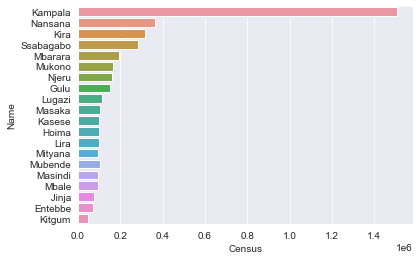

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
x=  population_data['Name']
y = population_data['Census']

sns.set_style('darkgrid')
sns.barplot(y, x)
plt.show()

In [58]:
population_data.head()

,Rank,Name,Census
0,1,Kampala,1507080
1,2,Nansana,365124
2,3,Kira,317157
3,4,Ssabagabo,283272
4,5,Mbarara,195531


In [63]:
# Getting cordinates of the towns

town_codes = population_data['Name']    
town_coords = [ get_latilong(codinates) for codinates in town_codes.tolist() ]

# Adding Columns Latitude & Longitude to the dataset
df_towns = pd.DataFrame(town_coords, columns=['Latitude', 'Longitude'])
population_data['Latitude'] = df_towns['Latitude']
population_data['Longitude'] = df_towns['Longitude']

In [64]:
population_data.head()

,Rank,Name,Census,Latitude,Longitude
0,1,Kampala,1507080,0.315820,32.575030
1,2,Nansana,365124,0.366980,32.528900
2,3,Kira,317157,0.337188,32.580896
3,4,Ssabagabo,283272,0.289466,32.604420
4,5,Mbarara,195531,-0.616670,30.650000


In [84]:
# Top 5 Most Populated Towns in Uganda and busy towns in Uganda
top_towns = population_data.nlargest(5,'Census')
top_towns

,Rank,Name,Census,Latitude,Longitude
0,1,Kampala,1507080,0.315820,32.575030
1,2,Nansana,365124,0.366980,32.528900
2,3,Kira,317157,0.337188,32.580896
3,4,Ssabagabo,283272,0.289466,32.604420
4,5,Mbarara,195531,-0.616670,30.650000


### Mapping the Top 5 Towns on top of marked Clusters

In [90]:
from folium.plugins import Draw
import os 
# create map
uganda_merged['Cluster Labels'] = uganda_merged['Cluster Labels'].fillna(0).astype(int)
#uganda_merged['Cluster Labels'] = uganda_merged['Cluster Labels'].astype(int)
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

draw = Draw()
draw.add_to(map_clusters)
map_clusters.save(os.path.join(r'C:/Users/KIKA/Downloads','capston.html'))
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(uganda_merged['Latitude'], uganda_merged['Longitude'], uganda_merged['Location'], uganda_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

#### In Conclusion 
Nansana and Kira Town being the second and third most populated town and well clusted yet with less ATM.
These two towns can be considered as good location for adding an ATM